In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [2]:
house_data = pd.read_csv('kc_house_data.csv')

In [3]:
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [46]:
house_data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,20150223,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,20140623,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,20150116,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
house_data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
house_data['date'] = house_data['date'].map(lambda x:x[0:8])

In [7]:
house_data['date']

0        20141013
1        20141209
2        20150225
3        20141209
4        20150218
           ...   
21608    20140521
21609    20150223
21610    20140623
21611    20150116
21612    20141015
Name: date, Length: 21613, dtype: object

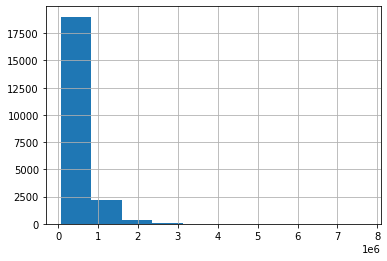

In [8]:
house_data['price'].hist()
plt.show()

In [11]:
house_data = house_data.drop('id', axis = 1)

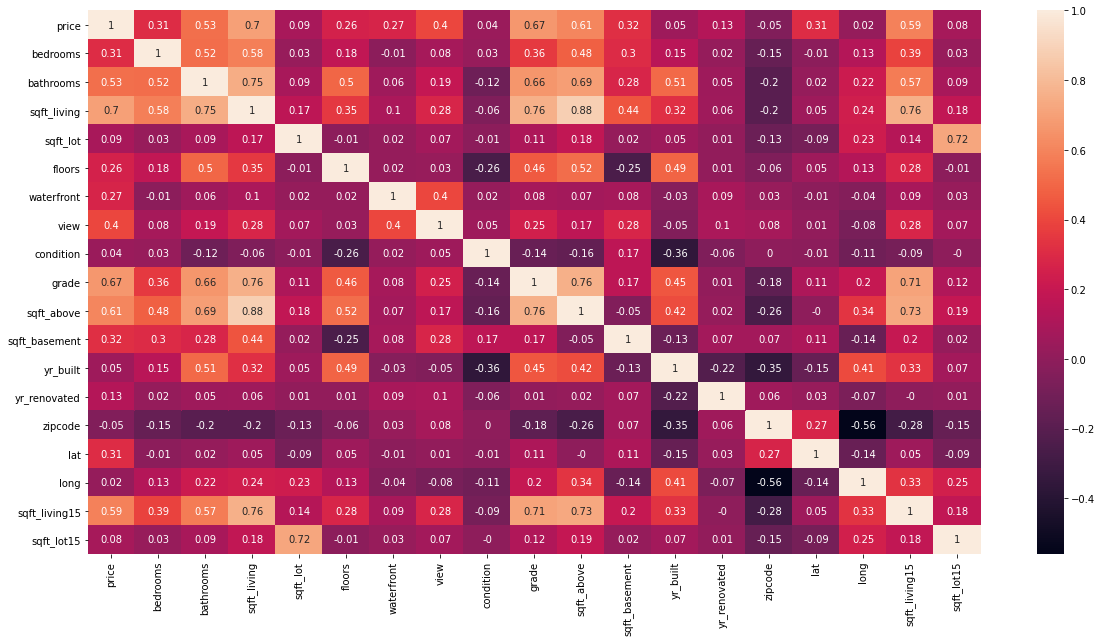

In [13]:
plt.figure(figsize=(20, 10))
corr = house_data.corr().round(2)
sns.heatmap(corr, annot=True)
plt.show()

#### By looking at the correlation matrix, we can see that sqft_living has the highest correlation with price(0.7). Also the features grade and sqft_above have a strong relationship with the price. 

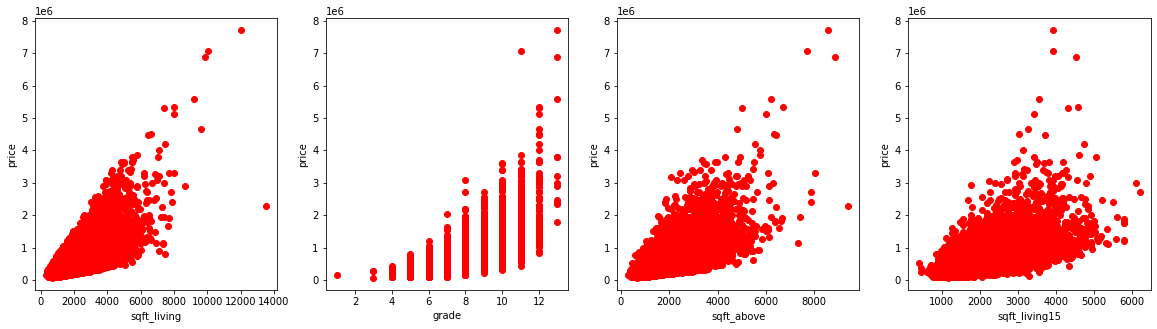

In [52]:
plt.figure(figsize=(20, 5))
features = ["sqft_living", "grade","sqft_above","sqft_living15"]
for i,feature in enumerate(features):
    plt.subplot(1,len(features),i+1)
    x = house_data[feature]
    plt.xlabel(feature)
    plt.ylabel('price')
    y = house_data['price']
    plt.scatter(x,y,color= 'red')
plt.show()

In [48]:
X= house_data['sqft_living'].values.reshape(-1,1)
Y= house_data['price']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 30)

In [49]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(17290, 1)
(4323, 1)
(17290,)
(4323,)


In [50]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

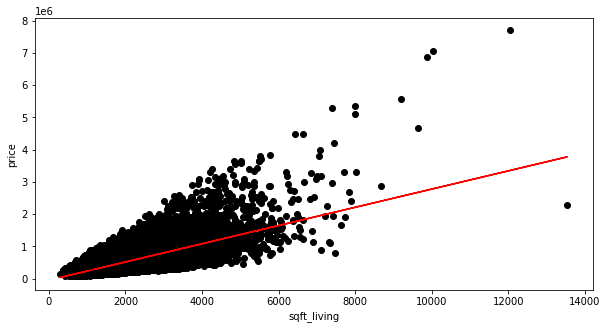

In [58]:
plt.figure(figsize=(10, 5))
plt.scatter(X,Y, color = 'k')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.plot(X,model.predict(X),color='red')
plt.show()

In [62]:
print(' the MSE is:', mean_squared_error(Y_test,model.predict(X_test)))
print('the R squared is:',metrics.r2_score(Y_test,model.predict(X_test)))

 the MSE is: 64179676631.68388
the R squared is: 0.4879814110728805


### As we can see here,the linear regression does not give us a good result since the MSE is too high and the R² is too low.

In [68]:
import numpy as np
X1 = np.c_[house_data['sqft_living'],house_data['grade'],house_data['sqft_above']]
Y1 = house_data['price']
X1_train,X1_test,Y1_train,Y1_test = train_test_split(X1,Y1,test_size = 0.2, random_state = 30)


In [69]:
lg = LinearRegression()
lg.fit(X1_train,Y1_train)

LinearRegression()

In [70]:
print(' the MSE is:', mean_squared_error(Y1_test,lg.predict(X1_test)))
print('the R squared is:',metrics.r2_score(Y1_test,lg.predict(X1_test)))

 the MSE is: 56970515284.14145
the R squared is: 0.5454953284723076


### For the multi-linear regression, it imporoves both MSE and R² but it still not sufficient to our model to be perfermant. 

In [71]:
from sklearn.preprocessing import PolynomialFeatures

In [74]:
def polynomial_regression_prediction(degree, original_X , original_Y):
    
    X_train,X_test,Y_train,Y_test = train_test_split(original_X,original_Y,test_size = 0.2, random_state = 30)
    
    poly = PolynomialFeatures(degree = degree)
    X_transform = poly.fit_transform(X_train)
    
    lg = LinearRegression()
    lg.fit(X_transform,Y_train)
    
    X_test_transform = poly.fit_transform(X_test)
    predicted_test = lg.predict(X_test_transform)
    
    
    print('mse :', mean_squared_error(Y_test,predicted_test))
    print('r2 :', metrics.r2_score(Y_test,predicted_test))

In [76]:
polynomial_regression_prediction(2,X1,Y1)

mse : 48364073872.04341
r2 : 0.6141565966303791


In [77]:
polynomial_regression_prediction(3,X1,Y1)

mse : 48859766971.0901
r2 : 0.6102020101563566


### We can see here, that the plynomial regression gave us the best result with a minimum mse and a maximum r2